In [1]:
## Addressing Challenges in Linear Regression

### 1. Assumption Violations

Linear regression rests on some strict assumptions. If they’re broken, the results can be misleading:
- Linearity: Relationship between predictors and target must be linear.
    - (But in real life, many relationships are curved, stepped, or more complex.)
- Independence: Observations should be independent.
    - (E.g., time series or clustered data often violate this.)
- Homoscedasticity: Constant variance of residuals.
    - (If residuals “fan out,” your model isn’t stable across ranges.)
- Normality of errors: Residuals should be normally distributed for inference.
    - (Outliers or skewed distributions break this.)

### 2. Multicollinearity

When predictors are highly correlated (e.g., Apps, Accept, and Enroll in your College dataset), it becomes hard for the model to decide which variable is “responsible” for explaining the target.

This leads to unstable coefficients (they swing wildly with small data changes).

You can detect this with VIF (Variance Inflation Factor).

### 3. Outliers & Influential Points

A single extreme data point can pull the regression line disproportionately.

E.g., one college with 100,000 undergrads could distort your entire model.

Remedies: detect with leverage plots, Cook’s distance, or robust regression.

### 4. Underfitting

Linear regression is too simple for complex relationships.

If reality is nonlinear or interaction-driven, plain linear regression will give low R² (like your <0.5 result).

### 5. Feature Engineering Needs

It doesn’t automatically capture interactions (e.g., Tuition × Faculty Ratio).

You must manually add polynomial or interaction terms to improve fit.

### 6. Sensitivity to Measurement Issues

If predictors are on wildly different scales, coefficients can look misleading.

If predictors have errors/noise, regression estimates get biased (attenuation bias).

### 7. Over-reliance on R²

A high R² doesn’t always mean the model is good (could be overfit).

A low R² doesn’t mean useless — sometimes the real world just has high variance not explainable by your chosen predictors.

### Summary

| Challenge             | Why it Matters                     |
| --------------------- | ---------------------------------- |
| Assumption violations | Bias/inconsistent estimates        |
| Multicollinearity     | Unstable, inflated coefficients    |
| Outliers              | Distort line & coefficients        |
| Underfitting          | Misses real patterns               |
| Feature engineering   | Needed to capture complexity       |
| Measurement error     | Leads to biased estimates          |
| Misleading R²         | Not a universal “goodness” measure |


That’s why in practice, people often move from simple linear regression → regularized regression (Ridge, Lasso) → tree-based models once datasets get messy.

---

## 1. Scaling

#### 🔹 Why Scaling Helps in Machine Learning

**1. Puts Features on the Same Scale**
- Different features can have very different ranges.
    - Example:
        - Age ranges from 0–100
        - Income ranges from 10,000–1,000,000
- If you don’t scale, models that depend on distance or magnitude (KNN, K-means, SVM, Neural Nets) will think Income is far more important than Age just because of its large range.
- Scaling ensures fair comparison between features.
- Scaling does NOT do much for performance. This is expected, as scaling only improves the interpretability of coefficients

**MinMaxScaler vs StandardScaler**

| Aspect                | MinMaxScaler                                                                 | StandardScaler                                                            |
|-----------------------|-------------------------------------------------------------------------------|---------------------------------------------------------------------------|
| **Formula**           | X' = (X - X_min) / (X_max - X_min)                                           | X' = (X - mean) / std_dev                                                 |
| **What it does**      | Rescales data to a fixed range (default [0, 1], but can be customized).      | Standardizes data to have mean = 0 and std dev = 1.                       |
| **Effect on distribution** | Preserves the shape of the original distribution (just squishes it).    | Shifts & scales data → distribution centered at 0, spread in std devs.    |
| **Sensitive to outliers?** | ✅ Yes (outliers strongly affect min & max).                             | ⚠️ Less sensitive, but mean & std still influenced by outliers.           |
| **Use case**          | Neural nets, KNN, K-means, SVM with RBF kernel (needs bounded features).     | Linear/Logistic Regression, PCA, LDA, SVM (linear kernel).                |


| Feature     | Raw Values     | After MinMaxScaler (0–1) | After StandardScaler |
| ----------- | -------------- | ------------------------ | -------------------- |
| Age         | 25, 40, 60     | 0.0, 0.5, 1.0            | -1.0, 0.0, +1.0      |
| Income (\$) | 20k, 50k, 100k | 0.0, 0.375, 1.0          | -1.0, 0.0, +1.0      |


**2. Improves Convergence of Gradient Descent**

- Algorithms like Linear Regression, Logistic Regression, Neural Networks use optimization (gradient descent).
- If features are on very different scales:
    - The error surface is skewed → gradients take a zig-zag path → slow training.
- After scaling:
    - Error surface is symmetric → faster and smoother convergence.

**3. Better Performance for Distance-Based Algorithms**
- Models like KNN, K-means, SVM (RBF kernel) rely on Euclidean distances.
- Without scaling:
    - Large-scale features dominate the distance metric.
- With scaling:
    - Each feature contributes proportionally.

**4. Interpretability of Coefficients**
- In linear models (regression, logistic regression):
    - Coefficients indicate "importance" of features.
    - Without scaling, coefficients may look misleading because units differ.
    - With scaling, you can compare feature importance directly.

**⚡ In short:**
Scaling doesn’t change relationships in the data, but makes sure the model treats features fairly, trains faster, and gives interpretable results.

----
# What is Multicollinearity?

Multicollinearity happens when two or more independent variables (features) are highly correlated with each other in a regression model.

👉 This causes problems because:
- Coefficients become unstable (change drastically with small data changes).
- Hard to interpret feature importance.
- Model may still predict well, but interpretation suffers.

#### How to Detect Multicollinearity

| Method                              | What It Means                                                           | Rule of Thumb                          |
| ----------------------------------- | ----------------------------------------------------------------------- | -------------------------------------- |
| **Correlation Matrix**              | Pairwise correlations between features                                  | Correlation > 0.8 → possible issue     |
| **Variance Inflation Factor (VIF)** | Measures how much a variable’s variance is inflated due to collinearity | VIF > 10 → problematic, >5 (potential problem)  |
| **Condition Number**                | Matrix diagnostic                                                       | High (> 30) → multicollinearity        |


#### How to deal with multicollinearity

| Method                                   | How It Works                                                        | Effect on Multicollinearity                           | Pros                                         | Cons                                                        |
| ---------------------------------------- | ------------------------------------------------------------------- | ----------------------------------------------------- | -------------------------------------------- | ----------------------------------------------------------- |
| **Drop one of the correlated variables** | Remove one of the highly correlated features                        | Reduces redundancy                                    | Simple, interpretable                        | May lose information                                        |
| **Combine features**                     | Create a new feature (e.g., sum or average)                         | Reduces collinearity                                  | Keeps information, simpler features          | May be arbitrary                                            |
| **Regularization (Ridge / Lasso)**       | Shrinks coefficients (L2 for Ridge, L1 for Lasso)                   | Reduces impact of collinear features                  | Good prediction performance                  | Coefficients biased; Lasso may drop features arbitrarily    |
| **Principal Component Analysis (PCA)**   | Converts correlated features into orthogonal components             | Eliminates collinearity                               | No collinearity, reduces dimensions          | Hard to interpret                                           |
| **Recursive Feature Elimination (RFE)**  | Recursively removes least important features based on model weights | Can remove redundant collinear features automatically | Keeps only important features; interpretable | Computationally intensive; may be sensitive to model choice |
| **Collect more data**                    | More samples reduce instability of coefficients                     | Can help in some cases                                | Improves generalization                      | Often not feasible                                          |


#### Difference between Ridge, Lasso, PCA for multicollinearity

| Method               | How It Works                                            | Effect on Multicollinearity                                | Pros                                 | Cons                                                  |
| -------------------- | ------------------------------------------------------- | ---------------------------------------------------------- | ------------------------------------ | ----------------------------------------------------- |
| **Ridge Regression** | Adds L2 penalty → shrinks coefficients                  | Handles collinearity well (keeps all features but shrinks) | Good prediction performance          | Coefficients still biased                             |
| **Lasso Regression** | Adds L1 penalty → shrinks some coefficients to 0        | Removes redundant features automatically                   | Feature selection + collinearity fix | May drop useful correlated variables                  |
| **PCA**              | Converts correlated features into orthogonal components | Eliminates collinearity by construction                    | No collinearity, fewer features      | Harder to interpret (components ≠ original variables) |


In [1]:
# Sample dataset

import pandas as pd
from sklearn.model_selection import train_test_split

# Example dataset with multicollinearity
data = {
    'X1': [1, 2, 3, 4, 5],
    'X2': [2, 4, 6, 8, 10],  # perfectly correlated with X1
    'X3': [5, 3, 6, 2, 7],
    'X4': [7, 8, 5, 6, 9],
    'Y': [10, 20, 30, 25, 35]
}

df = pd.DataFrame(data)
X = df[['X1','X2','X3','X4']]
y = df['Y']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [5]:
# Detect Multicollinearity with VIF

from statsmodels.stats.outliers_influence import variance_inflation_factor
import numpy as np

vif_data = pd.DataFrame()
vif_data['feature'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]
print("\nX1 and X2 have very high VIF, indicating multicollinearity.\n")

print(vif_data)




X1 and X2 have very high VIF, indicating multicollinearity.

  feature       VIF
0      X1       inf
1      X2       inf
2      X3  7.444737
3      X4  9.472627


/opt/homebrew/Caskroom/miniforge/base/envs/ai-lab/lib/python3.13/site-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


In [6]:
# Ridge Regression
from sklearn.linear_model import Ridge

ridge = Ridge(alpha=1.0) # L2 regularization
ridge.fit(X_train, y_train)

print("Ridge Coefficients:", ridge.coef_)
print("Ridge Intercept:", ridge.intercept_)

Ridge Coefficients: [ 1.21906266  2.43812533  1.92469721 -1.99315429]
Ridge Intercept: 9.02053712480253


In [7]:
# Lasso Regression
from sklearn.linear_model import Lasso
lasso = Lasso(alpha=0.1) # L1 regularization
lasso.fit(X_train, y_train)
print("Lasso Coefficients:", lasso.coef_)
print("Lasso Intercept:", lasso.intercept_)

Lasso Coefficients: [ 0.          3.16790123  2.1617284  -2.4       ]
Lasso Intercept: 9.799999999999995


In [9]:
# PCA to reduce multicollinearity
# Transforms correlated features into orthogonal components.
# Eliminates multicollinearity but components are less interpretable.

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
print("PCA Components:\n", pca.components_)
print("PCA Components shape:", X_pca.shape)
print("Explained Variance Ratio:", pca.explained_variance_ratio_)

PCA Components:
 [[ 0.64583984  0.64583984  0.30068345  0.27453829]
 [-0.28686358 -0.28686358  0.61467657  0.67645494]]
PCA Components shape: (5, 2)
Explained Variance Ratio: [0.54787888 0.25955737]


In [13]:
# RFE (Recuursive Feature Elimination) for feature selection)
# RFE recursively removes least important features.
# Helps automatically drop redundant/correlated features.
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

model = LinearRegression()
rfe = RFE(model, n_features_to_select=5)
X_rfe = rfe.fit_transform(X_train, y_train)

print("Selected Features:", X_train.columns[rfe.support_])

Selected Features: Index(['X1', 'X2', 'X3', 'X4'], dtype='object')


/opt/homebrew/Caskroom/miniforge/base/envs/ai-lab/lib/python3.13/site-packages/sklearn/feature_selection/_rfe.py:300: UserWarning: Found n_features_to_select=5 > n_features=4. There will be no feature selection and all features will be kept.
  warnings.warn(


| Method | How it Handles Multicollinearity             | Pros                                      | Cons                                       |
| ------ | -------------------------------------------- | ----------------------------------------- | ------------------------------------------ |
| Ridge  | Shrinks coefficients of correlated features  | Keeps all features, stable predictions    | Coefficients biased                        |
| Lasso  | Shrinks some coefficients to zero            | Performs feature selection                | May drop useful correlated features        |
| PCA    | Converts features to orthogonal components   | No collinearity, dimensionality reduction | Harder to interpret                        |
| RFE    | Removes least important features recursively | Keeps only important features             | Computationally intensive, model-dependent |


---

## Categorical predictors and VIF

VIF (Variance Inflation Factor) measures multicollinearity among numerical predictors, so handling categorical predictors requires some care. Let me break it down clearly.

#### Why Categorical Predictors Affect VIF

- Categorical variables must be encoded numerically before VIF can be calculated.
- One-hot encoding is the standard approach.
    - Example: Staff = ["A","B","C"] → becomes 3 columns: Staff_A, Staff_B, Staff_C.
- Problem: Perfect multicollinearity arises if you don’t drop one category (dummy variable trap).
    - VIF for one-hot columns will be very high / infinite if all categories are included.
    - Solution → drop='first' in OneHotEncoder.

In [16]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from statsmodels.stats.outliers_influence import variance_inflation_factor

df = pd.DataFrame({
    "Muffins": [1, 2, 4, 3, 2],
    "Staff": ["A", "A", "B", "A", "C"],
    "Time Taken": [5, 8, 12, 6, 4]
})

# Separate features and target
X = df[["Muffins", "Staff"]]

# One-hot encode categorical variables
encoder = OneHotEncoder(drop='first', sparse_output=False)
X_cat = encoder.fit_transform(X)

# Create DataFrame with encoded features
X_cat_df = pd.DataFrame(X_cat, columns=encoder.get_feature_names_out(X.columns))
print("Encoded Features:\n", X_cat_df)

# Combine with numerical features
X_num = df[["Muffins"]].reset_index(drop=True)
print("Numerical Features:\n", X_num)
X_final = pd.concat([X_num, X_cat_df.iloc[:, 1:]], axis=1)  # Avoid duplicate Muffins column
print("Final Feature Set:\n", X_final)

# Calculate VIF
vif_data = pd.DataFrame()
vif_data['feature'] = X_final.columns
vif_data['VIF'] = [variance_inflation_factor(X_final.values, i) for i in range(len(X_final.columns))]
print("\nVIF with Categorical Predictors:\n", vif_data)

Encoded Features:
    Muffins_2  Muffins_3  Muffins_4  Staff_B  Staff_C
0        0.0        0.0        0.0      0.0      0.0
1        1.0        0.0        0.0      0.0      0.0
2        0.0        0.0        1.0      1.0      0.0
3        0.0        1.0        0.0      0.0      0.0
4        1.0        0.0        0.0      0.0      1.0
Numerical Features:
    Muffins
0        1
1        2
2        4
3        3
4        2
Final Feature Set:
    Muffins  Muffins_3  Muffins_4  Staff_B  Staff_C
0        1        0.0        0.0      0.0      0.0
1        2        0.0        0.0      0.0      0.0
2        4        0.0        1.0      1.0      0.0
3        3        1.0        0.0      0.0      0.0
4        2        0.0        0.0      0.0      1.0

VIF with Categorical Predictors:
      feature  VIF
0    Muffins  6.8
1  Muffins_3  2.8
2  Muffins_4  inf
3    Staff_B  inf
4    Staff_C  1.8


/opt/homebrew/Caskroom/miniforge/base/envs/ai-lab/lib/python3.13/site-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


#### Key Notes

| Issue                                                    | How to Fix                                                                                                              |
| -------------------------------------------------------- | ----------------------------------------------------------------------------------------------------------------------- |
| High VIF due to one-hot encoding of categorical variable | Use `drop='first'` in `OneHotEncoder`                                                                                   |
| High VIF among numeric predictors + encoded dummies      | Consider **dropping correlated numeric variables**, **combining categories**, or **using regularization** (Ridge/Lasso) |
| More than 2–3 categories                                 | Consider **Target Encoding** or **frequency encoding** to reduce dimensionality before VIF calculation                  |


#### Optional Tips

RFE or regularization can also handle collinearity caused by encoded categorical variables.

Avoid interpreting VIF blindly if there are too many dummy variables — sometimes the problem is natural redundancy.

---
## What is Overfitting?

Overfitting occurs when a model fits the training data too well, capturing not only the true patterns but also noise and random fluctuations.
- The model performs very well on training data but poorly on unseen/test data.
- Often happens with complex models (many parameters) relative to small datasets.

Visual intuition:
- Underfitting: Model too simple → misses patterns.
- Good fit: Model captures true patterns → generalizes.
- Overfitting: Model too complex → memorizes training data.

#### Causes of Overfitting

- Too complex model: High-degree polynomials, deep trees, too many layers in neural networks.
- Small dataset: Model has too few examples to learn generalizable patterns.
- Noisy data: Irrelevant features or measurement errors confuse the model.
- Too many features: Especially correlated features increase variance.

#### How to detect overfitting 

| Method                  | What to Look For                                                 |
| ----------------------- | ---------------------------------------------------------------- |
| **Train vs Test Error** | Training error very low, test error high → overfitting           |
| **Cross-Validation**    | Large difference between CV score and training score             |
| **Learning Curves**     | Training score high, validation score plateaus low → overfitting |


#### How to address overfitting

| Technique                    | Description                                                     | When to Use                                    |
| ---------------------------- | --------------------------------------------------------------- | ---------------------------------------------- |
| **Simpler Model**            | Reduce model complexity (fewer layers, lower-degree polynomial) | Always consider first                          |
| **Regularization**           | Ridge (L2), Lasso (L1), ElasticNet penalize large coefficients  | Regression, logistic regression, linear models |
| **Feature Selection**        | Remove irrelevant/redundant features                            | When too many features or correlated features  |
| **Cross-Validation**         | Use CV to select hyperparameters that generalize well           | Any model training                             |
| **More Data**                | Train on more examples to help model generalize                 | Feasible if data available                     |
| **Dropout / Early Stopping** | Neural networks: randomly drop neurons or stop training early   | Deep learning                                  |
| **Ensemble Methods**         | Bagging (Random Forest), Boosting reduce variance               | Trees / complex models                         |


#### Quick Example (Linear Regression)

Suppose you fit a 10-degree polynomial on 5 points:
- Training R² = 1.0 → perfect fit
- Test R² = -5.0 → terrible generalization

Fix:
- Reduce degree → simpler model
- Apply Ridge/Lasso → shrink coefficients
- Use cross-validation → pick model that generalizes

---
## What is Heteroscedasticity?

Heteroscedasticity occurs when the variance of the residuals (errors) is not constant across all values of the independent variable(s).
- In simple terms: the spread of errors changes depending on X̂ (predicted values).
- Violates one of the key assumptions of linear regression: homoscedasticity (constant variance of errors).

Why it matters:
- Standard errors become unreliable → t-tests, p-values, and confidence intervals are misleading.
- Coefficient estimates are still unbiased, but inference is affected.

#### How to detect heteroscedasticity

| Method                              | How it Works                                                         | Interpretation                                                         |                  |                                                          |
| ----------------------------------- | -------------------------------------------------------------------- | ---------------------------------------------------------------------- | ---------------- | -------------------------------------------------------- |
| **Residuals vs Fitted Plot**        | Plot residuals (Y - Ŷ) on y-axis vs predicted values (Ŷ) on x-axis | Random scatter → homoscedastic. Funnel / cone shape → heteroscedastic. |                  |                                                          |
| **Breusch-Pagan Test / White Test** | Statistical tests implemented in `statsmodels`                       | p-value < 0.05 → reject null (heteroscedasticity present)              |                  |                                                          |
| **Scale-Location Plot**             | Plot √                                                               | residuals                                                              | vs fitted values | Horizontal line → homoscedastic, trend → heteroscedastic |


#### Visual Interpretation

| Type            | Shape                                            | Interpretation                             |
| --------------- | ------------------------------------------------ | ------------------------------------------ |
| Homoscedastic   | Even spread, no clear pattern                    | Good, constant error variance              |
| Heteroscedastic | Funnel or cone, errors increase/decrease with Ŷ | Bad, violates linear regression assumption |


#### Remedies for Heteroscedasticity

| Technique                            | How It Helps                                                       | Notes                                                |
| ------------------------------------ | ------------------------------------------------------------------ | ---------------------------------------------------- |
| **Transform Target Variable**        | Apply log, square root, or Box-Cox transform                       | Often stabilizes variance                            |
| **Weighted Least Squares (WLS)**     | Give smaller weights to observations with high variance            | Useful when variance pattern is known                |
| **Robust Standard Errors**           | Adjusts standard errors for heteroscedasticity                     | Coefficient estimates unchanged, inference corrected |
| **Remove Outliers**                  | Extreme points may cause variance to increase                      | Only if outliers are erroneous or non-representative |
| **Polynomial / Feature Engineering** | Sometimes heteroscedasticity arises due to model mis-specification | Adding proper features can reduce it                 |


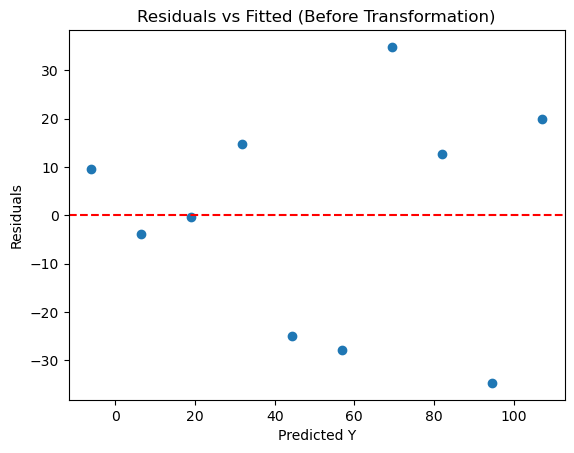

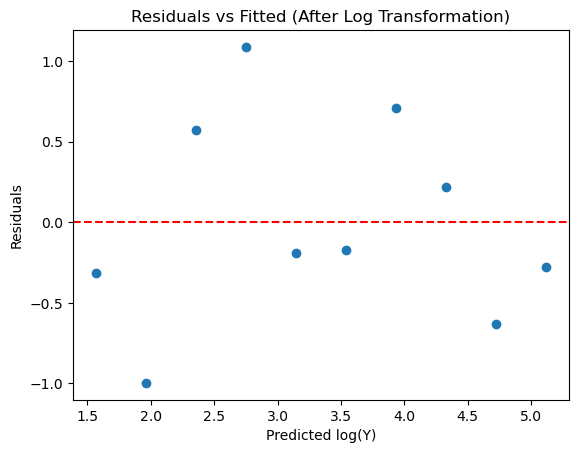

In [18]:
import statsmodels.api as sm
import matplotlib.pyplot as plt
from statsmodels.stats.diagnostic import het_breuschpagan
from sklearn.linear_model import LinearRegression
import pandas as pd
import numpy as np

# Create dataset with heteroscedasticity
np.random.seed(42)
X = np.arange(1, 11)  # 1 to 10
y = X**2 + np.random.normal(0, 5*X, size=X.shape)  # Variance increases with X

df = pd.DataFrame({'X': X, 'Y': y})

# Fit linear regression
model = LinearRegression().fit(df[['X']], df['Y'])
y_pred = model.predict(df[['X']])
residuals = df['Y'] - y_pred

# Residual plot
plt.scatter(y_pred, residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicted Y")
plt.ylabel("Residuals")
plt.title("Residuals vs Fitted (Before Transformation)")
plt.show()

# Apply log transformation to Y
df['Y_log'] = np.log(df['Y'])

# Fit regression on log(Y)
model_log = LinearRegression().fit(df[['X']], df['Y_log'])
y_log_pred = model_log.predict(df[['X']])
residuals_log = df['Y_log'] - y_log_pred

# Residual plot after log transform
plt.scatter(y_log_pred, residuals_log)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicted log(Y)")
plt.ylabel("Residuals")
plt.title("Residuals vs Fitted (After Log Transformation)")
plt.show()





Interpretation:
- Residuals now have roughly constant spread → homoscedastic.
- Log transformation stabilizes variance when it grows with the magnitude of Y.

| Step          | Observation                                               |
| ------------- | --------------------------------------------------------- |
| Original Data | Residuals fan out → heteroscedasticity present            |
| After log(Y)  | Residuals evenly spread → homoscedasticity restored       |
| Why it helps  | Log compresses larger values → reduces variance at high Y |


#### Key Takeaways

- Heteroscedasticity affects inference, not coefficient estimates.
- Residual plots are the simplest first step to detect.
- Remedies include transforming variables, using WLS, or robust standard errors.